### Data Collection

In [4]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas_datareader as pdr

In [16]:
# USE THE UNIQUE USER ID as KEY

In [17]:
df= pdr.get_data_tiingo('TSLA', api_key= key)

In [20]:
df.head()

close     high     low    open   volume  \
symbol date                                                                  
TSLA   2016-08-24 00:00:00+00:00  222.62  227.150  222.22  227.05  2570693   
       2016-08-25 00:00:00+00:00  220.96  223.800  220.77  223.11  1762519   
       2016-08-26 00:00:00+00:00  219.99  222.855  218.82  222.14  2238992   
       2016-08-29 00:00:00+00:00  215.20  220.400  215.00  220.15  3266334   
       2016-08-30 00:00:00+00:00  211.34  216.110  210.52  216.11  3168862   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
TSLA   2016-08-24 00:00:00+00:00    44.524   45.430  44.444   45.410   
       2016-08-25 00:00:00+00:00    44.192   44.760  44.154   44.622   
       2016-08-26 00:00:00+00:00    43.998   44.571  43.764   44.428   
       2016-08-29 00:00:00+00:00    43.040   44.080  43.000   44.030   
       2016-08-30 00:00:00+00:00    42.268   43.222  42.104   43.222   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
TSLA   2016-08-24 00:00:00+00:00   12853465      0.0          1.0  
       2016-08-25 00:00:00+00:00    8812595      0.0          1.0  
       2016-08-26 00:00:00+00:00   11194960      0.0          1.0  
       2016-08-29 00:00:00+00:00   16331670      0.0          1.0  
       2016-08-30 00:00:00+00:00   15844310      0.0          1.0

In [22]:
df.to_csv('TSLA.csv')

In [23]:
import pandas as pd

In [24]:
df= pd.read_csv('TSLA.csv')

In [25]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2016-08-24 00:00:00+00:00,222.62,227.150,222.22,227.05,2570693,44.524,45.430,44.444,45.410,12853465,0.0,1.0
1,TSLA,2016-08-25 00:00:00+00:00,220.96,223.800,220.77,223.11,1762519,44.192,44.760,44.154,44.622,8812595,0.0,1.0
2,TSLA,2016-08-26 00:00:00+00:00,219.99,222.855,218.82,222.14,2238992,43.998,44.571,43.764,44.428,11194960,0.0,1.0
3,TSLA,2016-08-29 00:00:00+00:00,215.20,220.400,215.00,220.15,3266334,43.040,44.080,43.000,44.030,16331670,0.0,1.0
4,TSLA,2016-08-30 00:00:00+00:00,211.34,216.110,210.52,216.11,3168862,42.268,43.222,42.104,43.222,15844310,0.0,1.0


In [27]:
df1=df.reset_index()['close']

In [28]:
df1.head()

0    222.62
1    220.96
2    219.99
3    215.20
4    211.34
Name: close, dtype: float64

In [29]:
df1.shape

(1257,)

In [31]:
import matplotlib.pyplot as plt

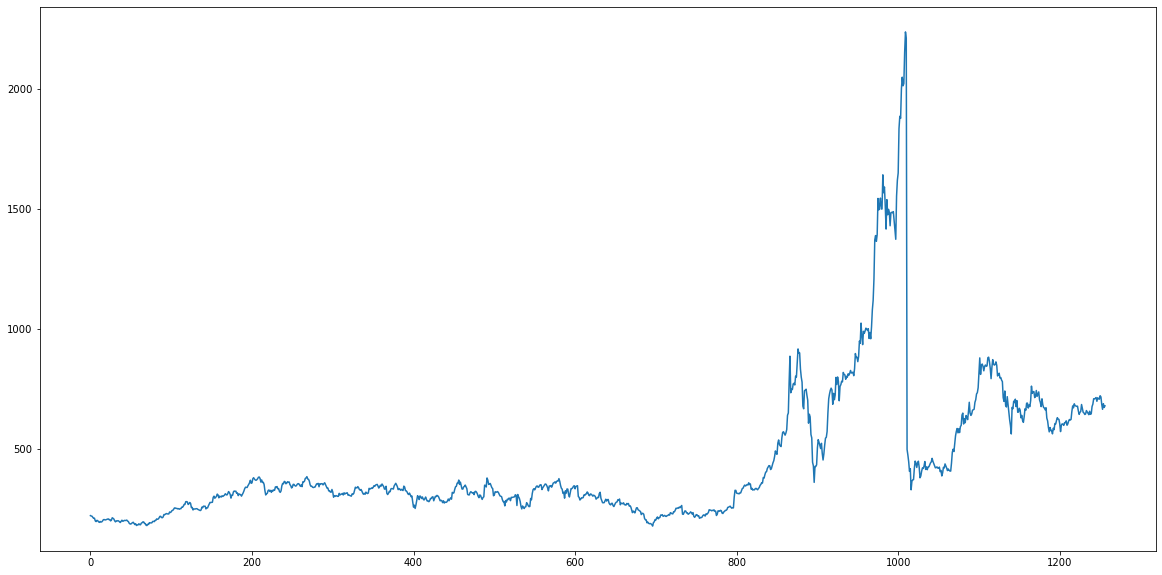

In [33]:
plt.figure(figsize=(20,10))
plt.plot(df1)

# LSTM
#### LSTM is sensitive to the scale so using MinMax Scalar to scale the data

In [34]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler= MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [37]:
df1.shape

(1257, 1)

In [39]:
df1

array([[0.02119158],
       [0.02038567],
       [0.01991475],
       ...,
       [0.24760897],
       [0.24007418],
       [0.24337065]])

In [100]:
# Splitting the data (df1) into train and test
training_size = int(len(df1) * 0.7)
test_size= len(df1) - training_size
print(training_size)
print(test_size)

879
378


In [106]:
train_data , test_data = df1[0:training_size, : ] , df1[training_size:len(df1), :1]

In [107]:
train_data

array([[0.02119158],
       [0.02038567],
       [0.01991475],
       [0.01758926],
       [0.01571527],
       [0.01604055],
       [0.01058365],
       [0.00913204],
       [0.01158376],
       [0.01104001],
       [0.00892814],
       [0.00752508],
       [0.0093845 ],
       [0.00829215],
       [0.00846692],
       [0.01041373],
       [0.01283147],
       [0.01328783],
       [0.0124625 ],
       [0.01274408],
       [0.01333152],
       [0.01382672],
       [0.01457437],
       [0.01303052],
       [0.01325384],
       [0.01054967],
       [0.01216635],
       [0.01686102],
       [0.01574925],
       [0.01431706],
       [0.01069532],
       [0.00856402],
       [0.01067104],
       [0.01025838],
       [0.01094292],
       [0.01032635],
       [0.00851547],
       [0.00727748],
       [0.00977289],
       [0.01193817],
       [0.00977289],
       [0.01025352],
       [0.01154978],
       [0.01134587],
       [0.01129732],
       [0.01215664],
       [0.01019526],
       [0.009

In [108]:
len(test_data)

378

In [109]:
# Converting array of data into dataset matrix
import numpy
def create_dataset(dataset,time_step=1): # Timestep is the amount of data we need on the X_train
    dataX=[]
    dataY=[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX) , numpy.array(dataY)

In [110]:
time_step=100 # Timestep is the amount of data we need on the X_train
X_train, y_train= create_dataset(train_data,time_step)
X_test , y_test= create_dataset(test_data,time_step)

In [111]:
X_train

array([[0.02119158, 0.02038567, 0.01991475, ..., 0.02457544, 0.02853703,
        0.02748352],
       [0.02038567, 0.01991475, 0.01758926, ..., 0.02853703, 0.02748352,
        0.02883318],
       [0.01991475, 0.01758926, 0.01571527, ..., 0.02748352, 0.02883318,
        0.03145482],
       ...,
       [0.02147802, 0.02414336, 0.03087223, ..., 0.28562274, 0.30344503,
        0.30151764],
       [0.02414336, 0.03087223, 0.03066347, ..., 0.30344503, 0.30151764,
        0.32985562],
       [0.03087223, 0.03066347, 0.03005175, ..., 0.30151764, 0.32985562,
        0.35850916]])

In [112]:
y_train

array([0.02883318, 0.03145482, 0.03192574, 0.03395994, 0.03672237,
       0.0366544 , 0.03570284, 0.03591646, 0.03479012, 0.03542126,
       0.03411529, 0.03523677, 0.03512997, 0.03825651, 0.03811572,
       0.04034897, 0.04380565, 0.04382021, 0.04934022, 0.04952471,
       0.04893241, 0.04368428, 0.04527668, 0.0477818 , 0.04589811,
       0.03739234, 0.03788269, 0.03265397, 0.03447941, 0.03449398,
       0.0347173 , 0.03524648, 0.03507171, 0.03379973, 0.03296469,
       0.03200827, 0.03142083, 0.03262484, 0.03836818, 0.03726612,
       0.0403344 , 0.04006739, 0.04027129, 0.0348144 , 0.03691656,
       0.0368049 , 0.0408733 , 0.04430085, 0.04781093, 0.04777695,
       0.04803911, 0.0482236 , 0.05804018, 0.06055501, 0.05633126,
       0.05812757, 0.05999184, 0.06477391, 0.06298731, 0.05722456,
       0.06070066, 0.05945781, 0.05888007, 0.0614386 , 0.05997728,
       0.06147744, 0.06265718, 0.06545359, 0.06369612, 0.06294847,
       0.06558953, 0.06984241, 0.06792958, 0.06410879, 0.05655

In [113]:
print(X_train.shape, y_train.shape)

(778, 100) (778,)


In [114]:
X_test.shape

(277, 100)

In [116]:
# For LSTM we need 3 dimensional input
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [117]:
X_train

array([[[0.02119158],
        [0.02038567],
        [0.01991475],
        ...,
        [0.02457544],
        [0.02853703],
        [0.02748352]],

       [[0.02038567],
        [0.01991475],
        [0.01758926],
        ...,
        [0.02853703],
        [0.02748352],
        [0.02883318]],

       [[0.01991475],
        [0.01758926],
        [0.01571527],
        ...,
        [0.02748352],
        [0.02883318],
        [0.03145482]],

       ...,

       [[0.02147802],
        [0.02414336],
        [0.03087223],
        ...,
        [0.28562274],
        [0.30344503],
        [0.30151764]],

       [[0.02414336],
        [0.03087223],
        [0.03066347],
        ...,
        [0.30344503],
        [0.30151764],
        [0.32985562]],

       [[0.03087223],
        [0.03066347],
        [0.03005175],
        ...,
        [0.30151764],
        [0.32985562],
        [0.35850916]]])

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [119]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer= "adam")

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 4s 147ms/step - loss: 0.0020 - val_loss: 0.0369
Epoch 2/100
13/13 [==============================] - 1s 82ms/step - loss: 6.9337e-04 - val_loss: 0.0216
Epoch 3/100
13/13 [==============================] - 1s 78ms/step - loss: 2.9328e-04 - val_loss: 0.0357
Epoch 4/100
13/13 [==============================] - 1s 78ms/step - loss: 2.5329e-04 - val_loss: 0.0343
Epoch 5/100
13/13 [==============================] - 1s 81ms/step - loss: 2.0750e-04 - val_loss: 0.0446
Epoch 6/100
13/13 [==============================] - 1s 78ms/step - loss: 2.2256e-04 - val_loss: 0.0479
Epoch 7/100
13/13 [==============================] - 1s 78ms/step - loss: 1.6886e-04 - val_loss: 0.0583
Epoch 8/100
13/13 [==============================] - 1s 79ms/step - loss: 1.6357e-04 - val_loss: 0.0732
Epoch 9/100
13/13 [==============================] - 1s 79ms/step - loss: 1.6505e-04 - val_loss: 0.0470
Epoch 10/100
13/13 [==============================] - 1s 79ms/step 

In [122]:
# Checking Performance and for Prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [123]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [124]:
train_predict.shape

(778, 1)

In [125]:
#Calculating RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

330.2435628251864

In [126]:
math.sqrt(mean_squared_error(y_test,test_predict))

981.7081940018886

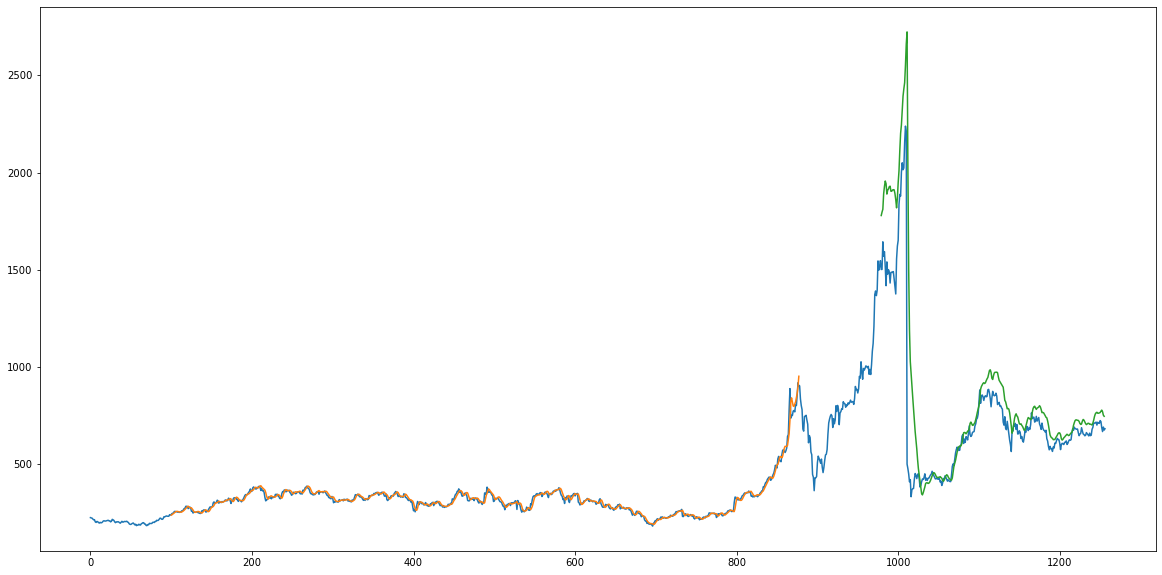

In [128]:
#Plotting
look_back=100
#Shifting train prediction for plotting
train_predict_plot= numpy.empty_like(df1)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:]= train_predict
#shifting test prediction for plotting
test_predict_plot= numpy.empty_like(df1)
test_predict_plot[:,:]=np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]= test_predict
#plotting baseline and prediction
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()


In [129]:
len(test_data)

378

In [130]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [131]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [132]:
temp_input

[0.23738457505170446,
 0.2343842546291351,
 0.24860907475555633,
 0.24888580333822052,
 0.2388604608259134,
 0.24508928137956476,
 0.24179766771208572,
 0.25391546670032716,
 0.2832098573634077,
 0.26860150113118875,
 0.2718154366000252,
 0.2722669411296351,
 0.2600568992805056,
 0.26217363019351575,
 0.27437396226781496,
 0.26251347231257705,
 0.2672275679926982,
 0.27149986891803973,
 0.25525541562691156,
 0.25023546203963526,
 0.24178795793725538,
 0.25753721271203717,
 0.24562331899523243,
 0.2401372962161007,
 0.23884589616366797,
 0.23525327947644886,
 0.23954014506403593,
 0.21850391789414397,
 0.21275573119459357,
 0.1994970336637893,
 0.1906611385681966,
 0.19942421035256191,
 0.19315655069958926,
 0.19366145899076598,
 0.18666556622551922,
 0.19798716367767427,
 0.19512278010272938,
 0.2075318723358805,
 0.20668226703822734,
 0.21369272446571957,
 0.21938265251628813,
 0.21664935090155257,
 0.21600850576275132,
 0.20689102719707925,
 0.1912194506209401,
 0.20394411053607658,


In [133]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.27336645]
101
1 day input [0.23438425 0.24860907 0.2488858  0.23886046 0.24508928 0.24179767
 0.25391547 0.28320986 0.2686015  0.27181544 0.27226694 0.2600569
 0.26217363 0.27437396 0.26251347 0.26722757 0.27149987 0.25525542
 0.25023546 0.24178796 0.25753721 0.24562332 0.2401373  0.2388459
 0.23525328 0.23954015 0.21850392 0.21275573 0.19949703 0.19066114
 0.19942421 0.19315655 0.19366146 0.18666557 0.19798716 0.19512278
 0.20753187 0.20668227 0.21369272 0.21938265 0.21664935 0.21600851
 0.20689103 0.19121945 0.20394411 0.20689588 0.20614823 0.20381303
 0.20931847 0.20920681 0.21299362 0.20409461 0.20676966 0.21246444
 0.21572207 0.21451806 0.21591626 0.23186942 0.24315704 0.2392974
 0.24747789 0.2436134  0.24309878 0.24223461 0.24271039 0.23333074
 0.2260824  0.23004399 0.23205391 0.24601171 0.23768072 0.23032071
 0.22897106 0.22587364 0.22684461 0.23377739 0.231248   0.2283205
 0.22546583 0.23237919 0.22614551 0.22721359 0.24195788 0.24673994
 0.25764888 0.25768286 0.25825574 0.2

8 day output [[0.41156286]]
9 day input [0.2686015  0.27181544 0.27226694 0.2600569  0.26217363 0.27437396
 0.26251347 0.26722757 0.27149987 0.25525542 0.25023546 0.24178796
 0.25753721 0.24562332 0.2401373  0.2388459  0.23525328 0.23954015
 0.21850392 0.21275573 0.19949703 0.19066114 0.19942421 0.19315655
 0.19366146 0.18666557 0.19798716 0.19512278 0.20753187 0.20668227
 0.21369272 0.21938265 0.21664935 0.21600851 0.20689103 0.19121945
 0.20394411 0.20689588 0.20614823 0.20381303 0.20931847 0.20920681
 0.21299362 0.20409461 0.20676966 0.21246444 0.21572207 0.21451806
 0.21591626 0.23186942 0.24315704 0.2392974  0.24747789 0.2436134
 0.24309878 0.24223461 0.24271039 0.23333074 0.2260824  0.23004399
 0.23205391 0.24601171 0.23768072 0.23032071 0.22897106 0.22587364
 0.22684461 0.23377739 0.231248   0.2283205  0.22546583 0.23237919
 0.22614551 0.22721359 0.24195788 0.24673994 0.25764888 0.25768286
 0.25825574 0.2600569  0.25251726 0.25963452 0.25780423 0.25675072
 0.26375632 0.26129004 

23 day output [[1.1184723]]
24 day input [0.2388459  0.23525328 0.23954015 0.21850392 0.21275573 0.19949703
 0.19066114 0.19942421 0.19315655 0.19366146 0.18666557 0.19798716
 0.19512278 0.20753187 0.20668227 0.21369272 0.21938265 0.21664935
 0.21600851 0.20689103 0.19121945 0.20394411 0.20689588 0.20614823
 0.20381303 0.20931847 0.20920681 0.21299362 0.20409461 0.20676966
 0.21246444 0.21572207 0.21451806 0.21591626 0.23186942 0.24315704
 0.2392974  0.24747789 0.2436134  0.24309878 0.24223461 0.24271039
 0.23333074 0.2260824  0.23004399 0.23205391 0.24601171 0.23768072
 0.23032071 0.22897106 0.22587364 0.22684461 0.23377739 0.231248
 0.2283205  0.22546583 0.23237919 0.22614551 0.22721359 0.24195788
 0.24673994 0.25764888 0.25768286 0.25825574 0.2600569  0.25251726
 0.25963452 0.25780423 0.25675072 0.26375632 0.26129004 0.24623989
 0.23630679 0.24760897 0.24007418 0.24337065 0.27336645 0.2855916
 0.30261341 0.32080698 0.33896214 0.35684568 0.37462381 0.39268595
 0.41156286 0.4318538  0

In [137]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [138]:
len(df1)

1257

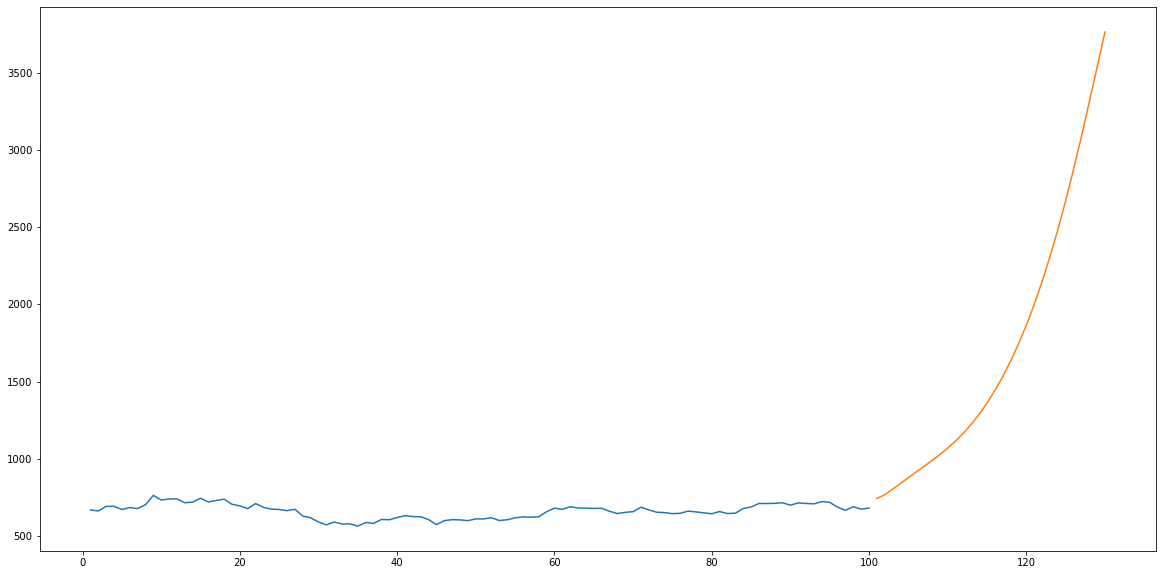

In [140]:
plt.figure(figsize=(20,10))
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

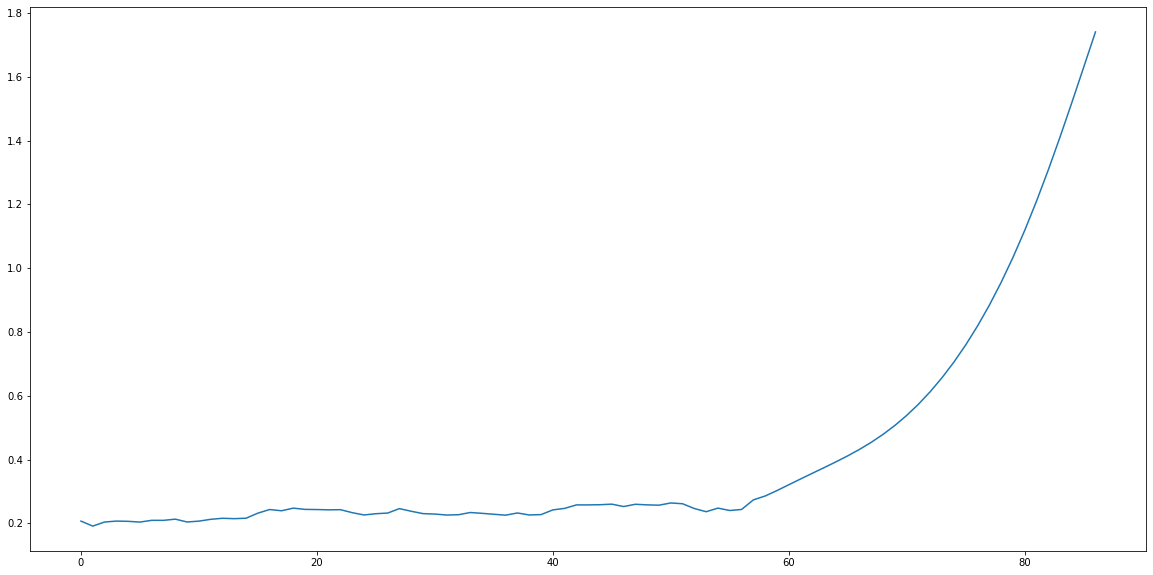

In [143]:
plt.figure(figsize=(20,10))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

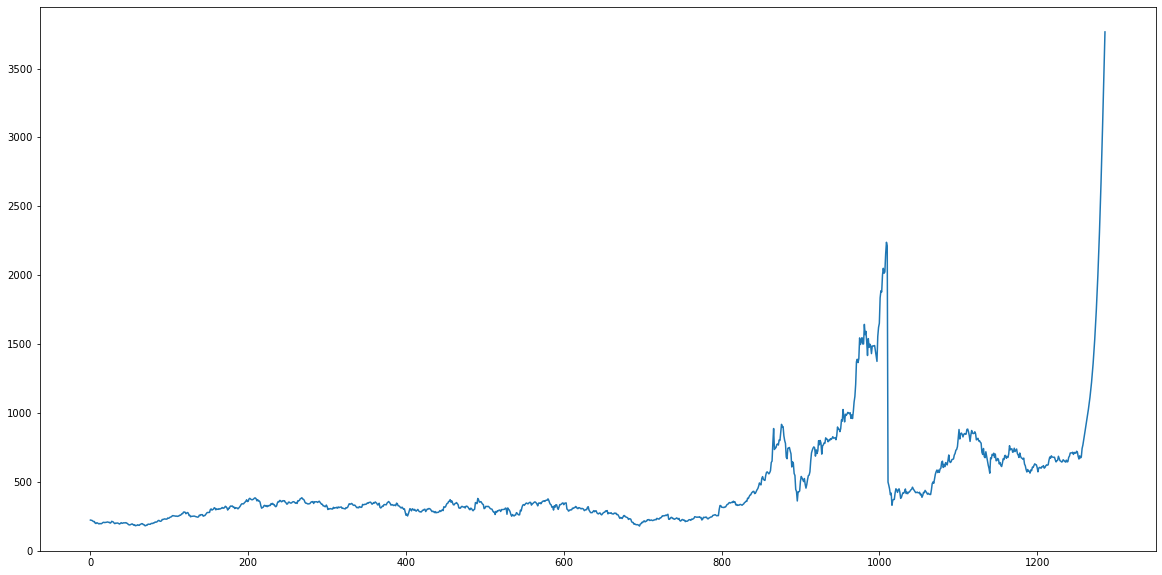

In [144]:
plt.figure(figsize=(20,10))
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)